<a href="https://colab.research.google.com/github/fi-co/py-CL-final-project/blob/main/word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic modelling using word embeddings (word2vec)

- dataset: date of publishing
- headline_text: test of the headline ascii, eng, lowercase
- date span: 2003-2019

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

headlines = pd.read_csv('abcnews-date-text.csv',parse_dates=[0], infer_datetime_format=True)

headlines.head()

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


creating wordclouds

# Gensim word2vec tutorial

In [ ]:
pip install nltk

In [ ]:
 import nltk

# Download NLTK data for tokenization
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

training SG and CBOW models separately

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize  # Assuming you have NLTK installed for tokenization

# Sample sentences for training (replace with your actual data)
sentences = [
    "Neuroscience research explores the intricacies of the human brain.",
    "Understanding neural networks is essential in neuroscience.",
    "Brain disorders pose significant challenges for medical professionals.",
    "Researchers investigate the role of neurotransmitters in mental health.",
]

# Tokenize the sentences
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# Train Word2Vec model with Skip-gram
model_skipgram = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, sg=1, min_count=1, workers=4)

# Train Word2Vec model with CBOW
model_cbow = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, sg=0, min_count=1, workers=4)


In [ ]:
# Get the vector for a specific word
vector_neuroscience_skipgram = model_skipgram.wv['neuroscience']
vector_neuroscience_cbow = model_cbow.wv['neuroscience']
print(vector_neuroscience_skipgram)

[ 9.4563962e-05  3.0773198e-03 -6.8126451e-03 -1.3754654e-03
  7.6685809e-03  7.3464094e-03 -3.6732971e-03  2.6427018e-03
 -8.3171297e-03  6.2054861e-03 -4.6373224e-03 -3.1641065e-03
  9.3113566e-03  8.7338570e-04  7.4907029e-03 -6.0740625e-03
  5.1605068e-03  9.9228229e-03 -8.4573915e-03 -5.1356913e-03
 -7.0648370e-03 -4.8626517e-03 -3.7785638e-03 -8.5361991e-03
  7.9556061e-03 -4.8439382e-03  8.4236134e-03  5.2625705e-03
 -6.5500261e-03  3.9578713e-03  5.4701497e-03 -7.4265362e-03
 -7.4057197e-03 -2.4752307e-03 -8.6257253e-03 -1.5815723e-03
 -4.0343284e-04  3.2996845e-03  1.4418805e-03 -8.8142155e-04
 -5.5940580e-03  1.7303658e-03 -8.9737179e-04  6.7936908e-03
  3.9735902e-03  4.5294715e-03  1.4343059e-03 -2.6998555e-03
 -4.3668128e-03 -1.0320747e-03  1.4370275e-03 -2.6460087e-03
 -7.0737829e-03 -7.8053069e-03 -9.1217868e-03 -5.9351693e-03
 -1.8474245e-03 -4.3238713e-03 -6.4606704e-03 -3.7173224e-03
  4.2891586e-03 -3.7390434e-03  8.3781751e-03  1.5339935e-03
 -7.2423196e-03  9.43379

**(relevant for the project)** now let's try on a file, instead of using a list of sentences written in the code:

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Load the CSV file
csv_file_path = 'arxiv_papers.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(csv_file_path, delimiter=',')

# Check the column names in your DataFrame
print(df.columns)

# Tokenize the 'abstract' column
df['tokenized_abstract'] = df['abstract'].apply(lambda x: word_tokenize(str(x).lower()))

# Display the tokenized data
print(df[['abstract', 'tokenized_abstract']])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Index(['title', 'abstract', 'published', 'authors', 'url'], dtype='object')
                                               abstract  \
0     Transformers have shown great potential in com...   
1     A critical aspect of reliable communication in...   
2     Point defects are responsible for a wide range...   
3     We investigate the electrostrictive response a...   
4     Institutions in highly regulated domains such ...   
...                                                 ...   
7995  We introduce a differentiable random access me...   
7996  We present the design and experimental demonst...   
7997  VM startup time is an essential factor in desi...   
7998  The introduction of COVID-19 lockdown measures...   
7999  Over the last several years, end-to-end neural...   

                                     tokenized_abstract  
0     [transformers, have, shown, great, potential, ...  
1     [a, critical, aspect, of, reliable, communicat...  
2     [point, defects, are, responsible, 

for our purpose, we are only interested in papers' abstract. We will only tokenize that one column 'abstract'.

In [ ]:
# Load the CSV file with a specified delimiter (',')
csv_file_path = 'arxiv_papers.csv'
df = pd.read_csv(csv_file_path, delimiter=',')
# Tokenize the 'abstract' column
df['tokenized_abstract'] = df['abstract'].apply(lambda x: word_tokenize(str(x).lower()))


let's save the DataFrame with the tokenized text to a new CSV file, but before let's create `unique_id` for each row:

In [ ]:
import string
import random
# Create a new column 'unique_id' with a unique ID for each row
def generate_unique_id():
    letters = string.ascii_uppercase
    numbers = ''.join(random.choice(string.digits) for _ in range(3))
    return 'ID' + ''.join(random.choice(letters) for _ in range(3)) + numbers

df['unique_id'] = [generate_unique_id() for _ in range(len(df))]

# Save only the 'tokenized_abstract' and 'unique_id' columns to a new CSV file
output_csv_path = 'tokenized_df.csv'
df[['unique_id', 'tokenized_abstract']].to_csv(output_csv_path, index=False) #this will save a .csv file in the local repository on the left


Done so far:


1. loading df: arxiv_papers.csv
2. tokenization of abstracts
3. creation of a new .csv file with a two columns: tokenized abstracts and unique id

the addition of a unique_id is beneficial in many ways: data integrity, referencing, indexing, consistency in results, traceability...


let's initialize our models:

In [ ]:
from gensim.models import Word2Vec

# Create Word2Vec model with Skip-gram
sg_model = Word2Vec(sentences=df['tokenized_abstract'], vector_size=300, window=5, sg=1, min_count=1)

# Create Word2Vec model with CBOW
cbow_model = Word2Vec(sentences=df['tokenized_abstract'], vector_size=300, window=5, min_count=1)


now we will train the 2 models on our corpus:

In [ ]:
sg_model.train(df['tokenized_abstract'], total_examples=len(df['tokenized_abstract']), epochs=7)
cbow_model.train(df['tokenized_abstract'], total_examples=len(df['tokenized_abstract']), epochs=7)


KeyboardInterrupt: ignored

In [ ]:
sg_embeddings = sg_model.wv
cbow_embeddings = cbow_model.wv


In [ ]:
# compare sg and cbow on Similarity between two words
similarity_sg = sg_model.wv.similarity('present', 'past')
similarity_cbow = cbow_model.wv.similarity('present', 'past')

print(f'Similarity (Skip-gram): {similarity_sg}')
print(f'Similarity (CBOW): {similarity_cbow}')

Similarity (Skip-gram): 0.3041270971298218
Similarity (CBOW): -0.02440708503127098


variation to tokenization process: include removing stopwords. Let's see how the result changes (analogy test)

In [ ]:
# Load the CSV file with a specified delimiter (',')
csv_file_path = 'arxiv_papers.csv'
df = pd.read_csv(csv_file_path, delimiter=',')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Download stopwords
nltk.download('stopwords')

# Set of stopwords
stop_words = set(stopwords.words('english'))

# Additional set of punctuation characters
additional_punctuation = set(string.punctuation)

# Tokenization without stemming, removing rare words, stopwords, and handling punctuation
df['tokenized_abstract'] = df['abstract'].apply(lambda x: [
    word.lower()  # Convert to lowercase
    for word in word_tokenize(x)  # Tokenize
    if word.isalnum()  # Check if the word is alphanumeric
    and word.lower() not in stop_words  # Remove stopwords
    and word.lower() not in additional_punctuation  # Remove additional punctuation
])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import string
import random
# Create a new column 'unique_id' with a unique ID for each row
def generate_unique_id():
    letters = string.ascii_uppercase
    numbers = ''.join(random.choice(string.digits) for _ in range(3))
    return 'ID' + ''.join(random.choice(letters) for _ in range(3)) + numbers

df['unique_id'] = [generate_unique_id() for _ in range(len(df))]

# Save only the 'tokenized_abstract' and 'unique_id' columns to a new CSV file
output_csv_path = 'tokenized_df.csv'
df[['unique_id', 'tokenized_abstract']].to_csv(output_csv_path, index=False) #this will save a .csv file in the local repository on the left


In [ ]:
from gensim.models import Word2Vec

# Create Word2Vec model with Skip-gram
sg_model = Word2Vec(sentences=df['tokenized_abstract'], vector_size=100, window=5, sg=1, min_count=20)

# Create Word2Vec model with CBOW
cbow_model = Word2Vec(sentences=df['tokenized_abstract'], vector_size=100, window=5, min_count=20)

#100-d vectors are a good compromise

I included  an early stopping technique to find the optimal number of epochs. it turned out pretty useful. the result is not huge, but I had some improvements

In [ ]:
from gensim.models import Word2Vec
import numpy as np

def compute_similarity(model, word1, word2):
    try:
        return model.wv.similarity(word1, word2)
    except KeyError:
        # Handle the case where one or both words are not in the vocabulary
        return 0.0

def train_with_early_stopping(model, data, total_examples, epochs, word1, word2, threshold=0.99, patience=10):
    best_similarity = -1.0
    no_improvement_count = 0
    similarity_scores = []

    for epoch in range(epochs):
        model.train(data, total_examples=total_examples, epochs=1)

        # Compute the similarity between two example words
        current_similarity = compute_similarity(model, word1, word2)
        similarity_scores.append(current_similarity)

        # Check if the similarity has improved
        if current_similarity > best_similarity:
            best_similarity = current_similarity
            no_improvement_count = 0
        else:
            no_improvement_count += 1

        # Check for early stopping
        if no_improvement_count >= patience or best_similarity >= threshold:
            print(f"Stopping training early. Best similarity: {best_similarity}")
            break

        print(f"Epoch {epoch + 1}/{epochs} - Current Similarity: {current_similarity}")

    return similarity_scores

# Usage
similarity_scores_sg = train_with_early_stopping(sg_model, df['tokenized_abstract'], len(df['tokenized_abstract']), epochs=50, word1='analysis', word2='assessment', threshold=0.99, patience=20)
similarity_scores_cbow = train_with_early_stopping(cbow_model, df['tokenized_abstract'], len(df['tokenized_abstract']), epochs=50, word1='analysis', word2='assessment', threshold=0.99, patience=20)


Epoch 1/50 - Current Similarity: 0.4491432011127472


Epoch 2/50 - Current Similarity: 0.4774262309074402


Epoch 3/50 - Current Similarity: 0.4212808310985565


Epoch 4/50 - Current Similarity: 0.4040582776069641


Epoch 5/50 - Current Similarity: 0.44441214203834534


Epoch 6/50 - Current Similarity: 0.41420412063598633


Epoch 7/50 - Current Similarity: 0.40153002738952637


Epoch 8/50 - Current Similarity: 0.4028075039386749


Epoch 9/50 - Current Similarity: 0.4193623960018158


Epoch 10/50 - Current Similarity: 0.4181252121925354


Epoch 11/50 - Current Similarity: 0.41905513405799866


Epoch 12/50 - Current Similarity: 0.43130719661712646


Epoch 13/50 - Current Similarity: 0.3946945369243622


Epoch 14/50 - Current Similarity: 0.41794857382774353


Epoch 15/50 - Current Similarity: 0.41302305459976196


Epoch 16/50 - Current Similarity: 0.41591641306877136


Epoch 17/50 - Current Similarity: 0.4415310323238373


Epoch 18/50 - Current Similarity: 0.406879186630249


Epoch 19/50 - Current Similarity: 0.4157421588897705


Epoch 20/50 - Current Similarity: 0.412286639213562


Epoch 21/50 - Current Similarity: 0.40269386768341064


Stopping training early. Best similarity: 0.4774262309074402


Epoch 1/50 - Current Similarity: 0.3245866596698761


Epoch 2/50 - Current Similarity: 0.31805649399757385


Epoch 3/50 - Current Similarity: 0.3254958391189575


Epoch 4/50 - Current Similarity: 0.32609400153160095


Epoch 5/50 - Current Similarity: 0.3049381375312805


Epoch 6/50 - Current Similarity: 0.3057565689086914


Epoch 7/50 - Current Similarity: 0.307082861661911


Epoch 8/50 - Current Similarity: 0.29342663288116455


Epoch 9/50 - Current Similarity: 0.3017275333404541


Epoch 10/50 - Current Similarity: 0.3054893910884857


Epoch 11/50 - Current Similarity: 0.3070618212223053


Epoch 12/50 - Current Similarity: 0.3212868273258209


Epoch 13/50 - Current Similarity: 0.31687065958976746


Epoch 14/50 - Current Similarity: 0.3153311610221863


Epoch 15/50 - Current Similarity: 0.3112269937992096


Epoch 16/50 - Current Similarity: 0.32263150811195374


Epoch 17/50 - Current Similarity: 0.3234459161758423


Epoch 18/50 - Current Similarity: 0.318774551153183


Epoch 19/50 - Current Similarity: 0.3101153075695038


Epoch 20/50 - Current Similarity: 0.318077027797699


Epoch 21/50 - Current Similarity: 0.3158894181251526


Epoch 22/50 - Current Similarity: 0.31552597880363464


Epoch 23/50 - Current Similarity: 0.34662148356437683


Epoch 24/50 - Current Similarity: 0.35490748286247253


Epoch 25/50 - Current Similarity: 0.32474714517593384


Epoch 26/50 - Current Similarity: 0.3100544512271881


Epoch 27/50 - Current Similarity: 0.31379058957099915


Epoch 28/50 - Current Similarity: 0.31934991478919983


Epoch 29/50 - Current Similarity: 0.3273618519306183


Epoch 30/50 - Current Similarity: 0.3250471353530884


Epoch 31/50 - Current Similarity: 0.30186620354652405


Epoch 32/50 - Current Similarity: 0.31849372386932373


Epoch 33/50 - Current Similarity: 0.3097054958343506


Epoch 34/50 - Current Similarity: 0.31094294786453247


Epoch 35/50 - Current Similarity: 0.31281399726867676


Epoch 36/50 - Current Similarity: 0.29133811593055725


Epoch 37/50 - Current Similarity: 0.3130922317504883


Epoch 38/50 - Current Similarity: 0.3159812092781067


Epoch 39/50 - Current Similarity: 0.3136565685272217


Epoch 40/50 - Current Similarity: 0.3139598071575165


Epoch 41/50 - Current Similarity: 0.2957603931427002


Epoch 42/50 - Current Similarity: 0.30695489048957825


Epoch 43/50 - Current Similarity: 0.3060102164745331
Stopping training early. Best similarity: 0.35490748286247253


plot similarity score over epochs for sg and cbow

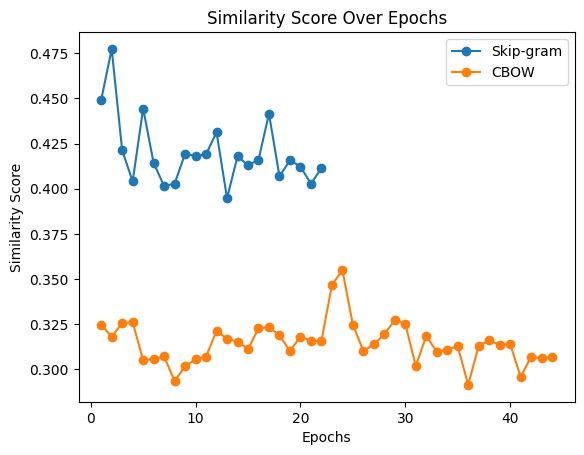

In [ ]:
import matplotlib.pyplot as plt

# Plot the similarity scores over epochs
plt.plot(range(1, len(similarity_scores_sg) + 1), similarity_scores_sg, marker='o', label='Skip-gram')
plt.plot(range(1, len(similarity_scores_cbow) + 1), similarity_scores_cbow, marker='o', label='CBOW')
plt.xlabel('Epochs')
plt.ylabel('Similarity Score')
plt.title('Similarity Score Over Epochs')
plt.legend()
plt.show()

testcase: neighbors

In [ ]:
sg_neighbors = sg_model.wv.most_similar('train')
cbow_neighbors = cbow_model.wv.most_similar('train')
print(sg_neighbors)
print(cbow_neighbors)

[('training', 0.5906608700752258), ('trained', 0.5620298981666565), ('learn', 0.5186135768890381), ('learning', 0.5150996446609497), ('trains', 0.497633159160614), ('generative', 0.4907844066619873), ('generate', 0.48567262291908264), ('network', 0.48358017206192017), ('neural', 0.4682280421257019), ('deep', 0.4591221511363983)]
[('trained', 0.5961503386497498), ('trains', 0.5646213293075562), ('training', 0.4804280400276184), ('learn', 0.46089187264442444), ('generate', 0.44735148549079895), ('build', 0.4290613830089569), ('learns', 0.39811253547668457), ('generating', 0.38309919834136963), ('select', 0.37321436405181885), ('millions', 0.36653757095336914)]
